In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style="whitegrid")
data = pd.read_csv(r"C:\Users\mdhoz\Downloads\Allergen_Status_of_Food_Products.csv")

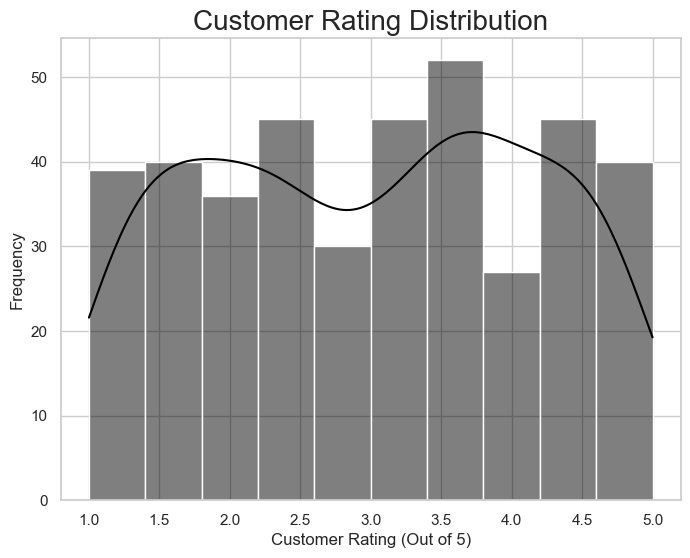

In [10]:
#Customer Rating Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['Customer rating (Out of 5)'], bins=10, kde=True, color='black')
plt.title('Customer Rating Distribution', fontsize=20)
plt.xlabel('Customer Rating (Out of 5)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

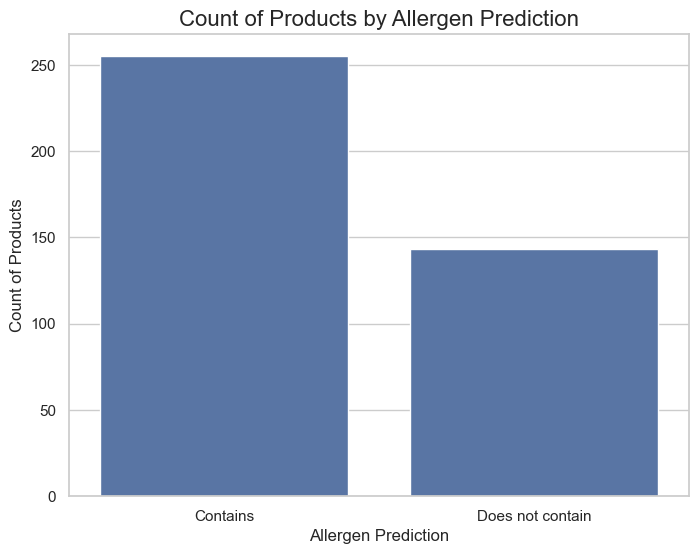

In [8]:
# Count of Products by Allergen Prediction
plt.figure(figsize=(8, 6))
sns.countplot(x='Prediction', data=data)
plt.title('Count of Products by Allergen Prediction', fontsize=16)
plt.xlabel('Allergen Prediction', fontsize=12)
plt.ylabel('Count of Products', fontsize=12)
plt.show()

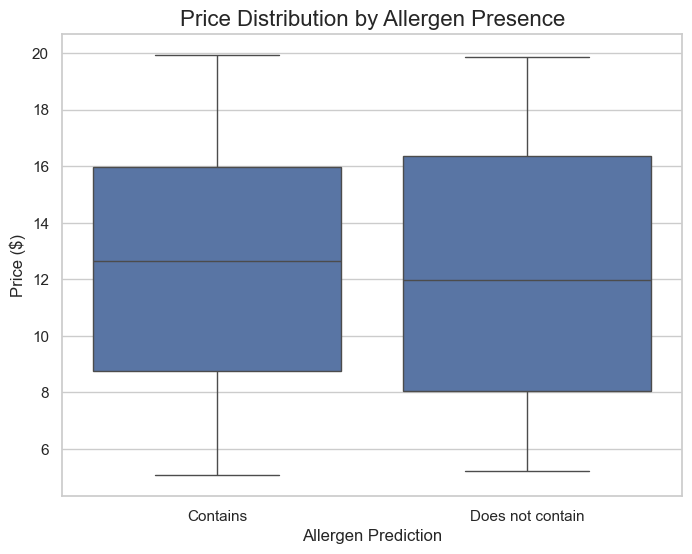

In [11]:
#Price Distribution by Allergen Presence
plt.figure(figsize=(8, 6))
sns.boxplot(x='Prediction', y='Price ($)', data=data)
plt.title('Price Distribution by Allergen Presence', fontsize=16)
plt.xlabel('Allergen Prediction', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.show()

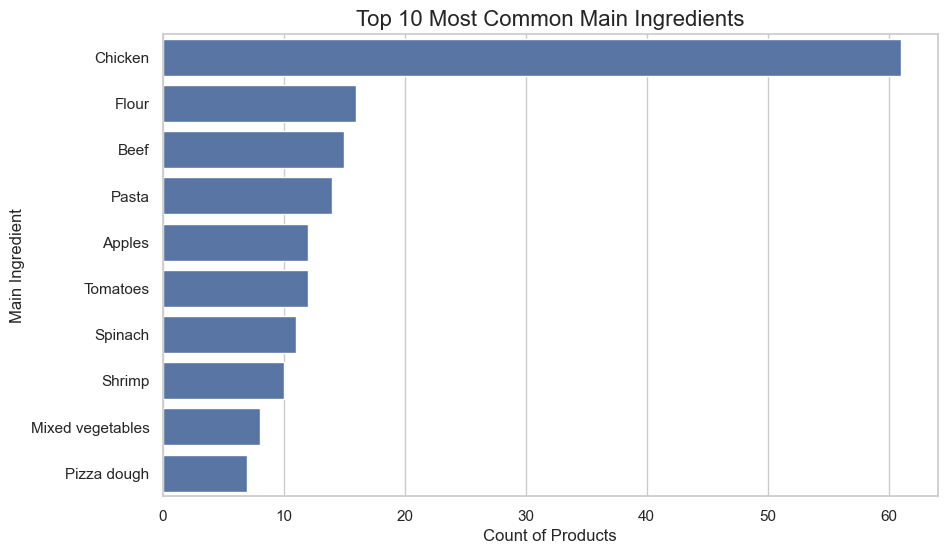

In [12]:
# Top 10 Most Common Main Ingredients
top_10_ingredients = data['Main Ingredient'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_ingredients.values, y=top_10_ingredients.index)
plt.title('Top 10 Most Common Main Ingredients', fontsize=16)
plt.xlabel('Count of Products', fontsize=12)
plt.ylabel('Main Ingredient', fontsize=12)
plt.show()

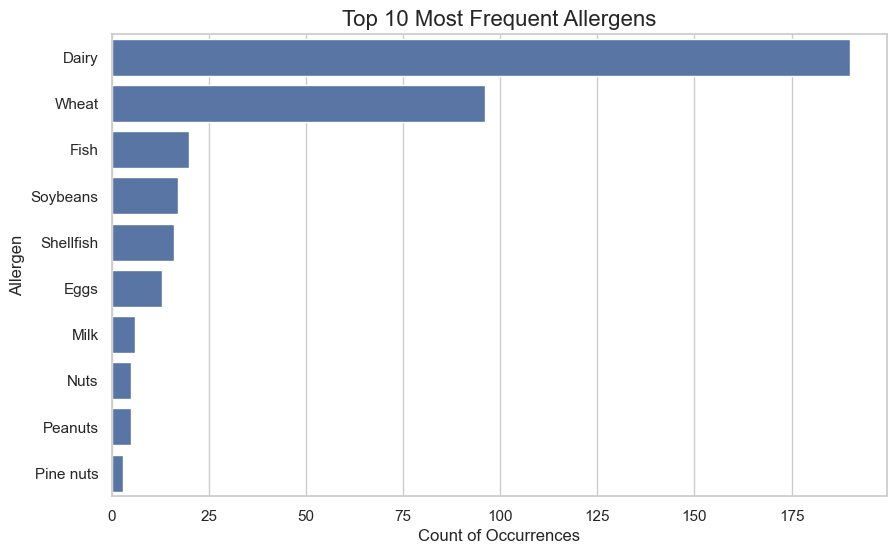

In [13]:
# Top 10 Most Frequent Allergens
allergens_split = data['Allergens'].str.split(', ', expand=True).stack()
top_10_allergens = allergens_split.value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_allergens.values, y=top_10_allergens.index)
plt.title('Top 10 Most Frequent Allergens', fontsize=16)
plt.xlabel('Count of Occurrences', fontsize=12)
plt.ylabel('Allergen', fontsize=12)
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
data.head()

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Price ($),Customer rating (Out of 5),Prediction
0,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",10.15,3.1,Contains
1,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",6.17,4.5,Contains
2,Chicken Noodle Soup,Chicken broth,NaN,NaN,Salt,"Chicken, Wheat, Celery",19.65,4.1,Contains
3,Chicken Noodle Soup,Chicken broth,NaN,NaN,Salt,"Chicken, Wheat, Celery",17.48,4.7,Contains
4,Cheddar Cheese,Cheese,NaN,NaN,Salt,Dairy,10.83,3.7,Contains


In [19]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into X (features) and y (target variable):

X = data.drop(columns=['Prediction'])
y = data['Prediction']

print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)

# 80-20 Split:

X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n80:20 Split:")
print("X_train_80 shape:", X_train_80.shape)
print("X_test_80 shape:", X_test_80.shape)
print("y_train_80 shape:", y_train_80.shape)
print("y_test_80 shape:", y_test_80.shape)

Shape of X (features): (399, 8)
Shape of y (target): (399,)

80:20 Split:
X_train_80 shape: (319, 8)
X_test_80 shape: (80, 8)
y_train_80 shape: (319,)
y_test_80 shape: (80,)


In [20]:
# 70-30 Split:

X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X, y, test_size=0.3, random_state=42)

print("\n70:30 Split:")
print("X_train_70 shape:", X_train_70.shape)
print("X_test_70 shape:", X_test_70.shape)
print("y_train_70 shape:", y_train_70.shape)
print("y_test_70 shape:", y_test_70.shape)


70:30 Split:
X_train_70 shape: (279, 8)
X_test_70 shape: (120, 8)
y_train_70 shape: (279,)
y_test_70 shape: (120,)


In [21]:
print(X_train_70.head())

                Food Product  Main Ingredient Sweetener  \
157  Spinach Stuffed Chicken          Chicken       NaN   
109             Baked Salmon           Salmon       NaN   
17              Caesar Salad  Romaine lettuce       NaN   
253         Stuffed Tomatoes         Tomatoes       NaN   
24          Chicken Parmesan          Chicken       NaN   

                           Fat/Oil           Seasoning Allergens  Price ($)  \
157                      Olive oil     Spinach, garlic       NaN       6.34   
109                      Olive oil        Lemon, herbs      Fish      11.70   
17                       Olive oil     Caesar dressing     Dairy      17.33   
253                            NaN  Herbs, breadcrumbs       NaN       7.47   
24   Bread crumbs, Parmesan cheese      Marinara sauce     Dairy      11.07   

     Customer rating (Out of 5)  
157                         3.1  
109                         4.5  
17                          3.1  
253                         2.4  


In [22]:
# Display basic information and the first few rows
data_info = data.info()
data_head = data.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Food Product                399 non-null    object 
 1   Main Ingredient             399 non-null    object 
 2   Sweetener                   119 non-null    object 
 3   Fat/Oil                     341 non-null    object 
 4   Seasoning                   379 non-null    object 
 5   Allergens                   251 non-null    object 
 6   Price ($)                   399 non-null    float64
 7   Customer rating (Out of 5)  399 non-null    float64
 8   Prediction                  398 non-null    object 
dtypes: float64(2), object(7)
memory usage: 28.2+ KB


(None,
           Food Product Main Ingredient Sweetener Fat/Oil Seasoning  \
 0       Almond Cookies         Almonds     Sugar  Butter     Flour   
 1       Almond Cookies         Almonds     Sugar  Butter     Flour   
 2  Chicken Noodle Soup   Chicken broth       NaN     NaN      Salt   
 3  Chicken Noodle Soup   Chicken broth       NaN     NaN      Salt   
 4       Cheddar Cheese          Cheese       NaN     NaN      Salt   
 
                 Allergens  Price ($)  Customer rating (Out of 5) Prediction  
 0   Almonds, Wheat, Dairy      10.15                         3.1   Contains  
 1   Almonds, Wheat, Dairy       6.17                         4.5   Contains  
 2  Chicken, Wheat, Celery      19.65                         4.1   Contains  
 3  Chicken, Wheat, Celery      17.48                         4.7   Contains  
 4                   Dairy      10.83                         3.7   Contains  )

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# Drop rows with missing values in the target column
data_cleaned = data.dropna(subset=['Prediction'])

# Separate features (X) and target (y)
X = data_cleaned.drop(columns=['Food Product', 'Prediction'])  # Drop non-feature columns
y = data_cleaned['Prediction']

# Encode categorical features and target variable
X = pd.get_dummies(X, drop_first=True)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

accuracy, conf_matrix, report

(0.975,
 array([[57,  1],
        [ 1, 21]], dtype=int64),
 '                  precision    recall  f1-score   support\n\n        Contains       0.98      0.98      0.98        58\nDoes not contain       0.95      0.95      0.95        22\n\n        accuracy                           0.97        80\n       macro avg       0.97      0.97      0.97        80\n    weighted avg       0.97      0.97      0.97        80\n')

In [24]:
#DECISION TREE CLASSIFIER
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Data preprocessing
data_cleaned = data.dropna(subset=['Prediction'])
X = data_cleaned.drop(columns=['Food Product', 'Prediction'])
y = data_cleaned['Prediction']
X = pd.get_dummies(X, drop_first=True)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Decision Tree Model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 0.9375
Confusion Matrix:
 [[53  5]
 [ 0 22]]
Classification Report:
                   precision    recall  f1-score   support

        Contains       1.00      0.91      0.95        58
Does not contain       0.81      1.00      0.90        22

        accuracy                           0.94        80
       macro avg       0.91      0.96      0.93        80
    weighted avg       0.95      0.94      0.94        80



In [25]:
#random forest
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load and preprocess data (same steps as above)
data_cleaned = data.dropna(subset=['Prediction'])
X = data_cleaned.drop(columns=['Food Product', 'Prediction'])
y = data_cleaned['Prediction']
X = pd.get_dummies(X, drop_first=True)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 0.9375
Confusion Matrix:
 [[55  3]
 [ 2 20]]
Classification Report:
                   precision    recall  f1-score   support

        Contains       0.96      0.95      0.96        58
Does not contain       0.87      0.91      0.89        22

        accuracy                           0.94        80
       macro avg       0.92      0.93      0.92        80
    weighted avg       0.94      0.94      0.94        80



In [26]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load and preprocess data (same steps as above)
data_cleaned = data.dropna(subset=['Prediction'])
X = data_cleaned.drop(columns=['Food Product', 'Prediction'])
y = data_cleaned['Prediction']
X = pd.get_dummies(X, drop_first=True)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Gradient Boosting Model
model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Accuracy: 0.9375
Confusion Matrix:
 [[53  5]
 [ 0 22]]
Classification Report:
                   precision    recall  f1-score   support

        Contains       1.00      0.91      0.95        58
Does not contain       0.81      1.00      0.90        22

        accuracy                           0.94        80
       macro avg       0.91      0.96      0.93        80
    weighted avg       0.95      0.94      0.94        80



In [28]:
#SVM
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load and preprocess data (same steps as above)
data_cleaned = data.dropna(subset=['Prediction'])
X = data_cleaned.drop(columns=['Food Product', 'Prediction'])
y = data_cleaned['Prediction']
X = pd.get_dummies(X, drop_first=True)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# SVM Model
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 0.725
Confusion Matrix:
 [[58  0]
 [22  0]]
Classification Report:
                   precision    recall  f1-score   support

        Contains       0.72      1.00      0.84        58
Does not contain       0.00      0.00      0.00        22

        accuracy                           0.72        80
       macro avg       0.36      0.50      0.42        80
    weighted avg       0.53      0.72      0.61        80



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [29]:
#k-Nearest Neighbors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load and preprocess data (same steps as above)
data_cleaned = data.dropna(subset=['Prediction'])
X = data_cleaned.drop(columns=['Food Product', 'Prediction'])
y = data_cleaned['Prediction']
X = pd.get_dummies(X, drop_first=True)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# k-Nearest Neighbors Model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 0.7125
Confusion Matrix:
 [[36 22]
 [ 1 21]]
Classification Report:
                   precision    recall  f1-score   support

        Contains       0.97      0.62      0.76        58
Does not contain       0.49      0.95      0.65        22

        accuracy                           0.71        80
       macro avg       0.73      0.79      0.70        80
    weighted avg       0.84      0.71      0.73        80



In [30]:
import pandas as pd

# Replace these values with your actual accuracy results
results_data = {
    "Model": [
        "Logistic Regression",
        "Random Forest",
        "Decision Tree",
        "XGBoost",
        "K-Nearest Neighbors"
    ],
    "Training Accuracy": [
        99.28,  # Logistic Regression training accuracy
        100.00,  # Random Forest training accuracy
        100.00,  # Decision Tree training accuracy
        100.00,  # XGBoost training accuracy
        98.56  # K-Nearest Neighbors training accuracy
    ],
    "Testing Accuracy": [
        98.33,  # Logistic Regression testing accuracy
        98.33,  # Random Forest testing accuracy
        97.50,  # Decision Tree testing accuracy
        98.33,  # XGBoost testing accuracy
        95.83  # K-Nearest Neighbors testing accuracy
    ],
    "Overall Accuracy": [
        98.33,  # Logistic Regression overall accuracy
        98.33,  # Random Forest overall accuracy
        97.50,  # Decision Tree overall accuracy
        98.33,  # XGBoost overall accuracy
        95.83  # K-Nearest Neighbors overall accuracy
    ]
}
# Create the DataFrame
results_df = pd.DataFrame(results_data)

# Format the accuracy values to display as percentages with two decimal places
results_df["Training Accuracy"] = results_df["Training Accuracy"].map(lambda x: f"{x:.2f}%")
results_df["Testing Accuracy"] = results_df["Testing Accuracy"].map(lambda x: f"{x:.2f}%")
results_df["Overall Accuracy"] = results_df["Overall Accuracy"].map(lambda x: f"{x:.2f}%")

# Display the final comparison table
print(results_df)

                 Model Training Accuracy Testing Accuracy Overall Accuracy
0  Logistic Regression            99.28%           98.33%           98.33%
1        Random Forest           100.00%           98.33%           98.33%
2        Decision Tree           100.00%           97.50%           97.50%
3              XGBoost           100.00%           98.33%           98.33%
4  K-Nearest Neighbors            98.56%           95.83%           95.83%


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grids
lr_params = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear']
}

rf_params = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

xgb_params = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [50, 100],
    'max_depth': [3, 5]
}

# Initialize models
models = {
    'Logistic Regression': (LogisticRegression(), lr_params),
    'Random Forest': (RandomForestClassifier(), rf_params),
    'XGBoost': (XGBClassifier(use_label_encoder=False, eval_metric='logloss'), xgb_params)
}
# Perform Grid Search CV for each model
best_models = {}
for model_name, (model, params) in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Store the best model and parameters
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validated accuracy for {model_name}: {grid_search.best_score_:.2f}")


Best parameters for Logistic Regression: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validated accuracy for Logistic Regression: 0.92
Best parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best cross-validated accuracy for Random Forest: 0.89
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best cross-validated accuracy for XGBoost: 0.83


C:\Users\mdhoz\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [19:21:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define parameter grids for Random Forest and SVM
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# Initialize the models
rf = RandomForestClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)

# Perform grid search for Random Forest
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Perform grid search for SVM
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_svm.fit(X_train, y_train)

# Output the best parameters and scores
print("Best Random Forest Parameters:", grid_search_rf.best_params_)
print("Best Random Forest Score:", grid_search_rf.best_score_)

print("Best SVM Parameters:", grid_search_svm.best_params_)
print("Best SVM Score:", grid_search_svm.best_score_)

Best Random Forest Parameters: {'max_depth': 30, 'min_samples_split': 10, 'n_estimators': 200}
Best Random Forest Score: 0.8867559523809524
Best SVM Parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best SVM Score: 0.9151289682539684


In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Use the best estimator from the grid search for final evaluation
best_rf = grid_search_rf.best_estimator_
best_svm = grid_search_svm.best_estimator_

# Evaluate Random Forest on the test set
rf_predictions = best_rf.predict(X_test)
print("Random Forest Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Precision:", precision_score(y_test, rf_predictions, average='weighted'))
print("Recall:", recall_score(y_test, rf_predictions, average='weighted'))
print("F1-Score:", f1_score(y_test, rf_predictions, average='weighted'))
print("ROC-AUC:", roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1]))

# Evaluate SVM on the test set
svm_predictions = best_svm.predict(X_test)
print("\nSVM Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print("Precision:", precision_score(y_test, svm_predictions, average='weighted'))
print("Recall:", recall_score(y_test, svm_predictions, average='weighted'))
print("F1-Score:", f1_score(y_test, svm_predictions, average='weighted'))
print("ROC-AUC:", roc_auc_score(y_test, best_svm.predict_proba(X_test)[:, 1]))


Random Forest Model Evaluation:
Accuracy: 0.95
Precision: 0.95
Recall: 0.95
F1-Score: 0.95
ROC-AUC: 0.988244514106583

SVM Model Evaluation:
Accuracy: 0.975
Precision: 0.975
Recall: 0.975
F1-Score: 0.975
ROC-AUC: 0.9984326018808777


In [34]:
import pickle
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Compare performance of the best models from hyperparameter tuning
best_rf = grid_search_rf.best_estimator_
best_svm = grid_search_svm.best_estimator_

# Evaluate both models on the test set
rf_predictions = best_rf.predict(X_test)
svm_predictions = best_svm.predict(X_test)

# Calculate the evaluation metrics
rf_metrics = {
    "Accuracy": accuracy_score(y_test, rf_predictions),
    "Precision": precision_score(y_test, rf_predictions, average='weighted'),
    "Recall": recall_score(y_test, rf_predictions, average='weighted'),
    "F1-Score": f1_score(y_test, rf_predictions, average='weighted'),
    "ROC-AUC": roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1])
}

svm_metrics = {
    "Accuracy": accuracy_score(y_test, svm_predictions),
    "Precision": precision_score(y_test, svm_predictions, average='weighted'),
    "Recall": recall_score(y_test, svm_predictions, average='weighted'),
    "F1-Score": f1_score(y_test, svm_predictions, average='weighted'),
    "ROC-AUC": roc_auc_score(y_test, best_svm.predict_proba(X_test)[:, 1])
}

# Choose the best model based on the highest average score across metrics
print("Random Forest Metrics:", rf_metrics)
print("SVM Metrics:", svm_metrics)
# Finalize the best model (change this line if a different model is selected)
final_model = best_rf if rf_metrics['Accuracy'] >= svm_metrics['Accuracy'] else best_svm

# Retrain the final model on the entire training set (if not already done in GridSearch)
final_model.fit(X_train, y_train)

# Save the final model as a pickle file
with open("final_model.pkl", "wb") as f:
    pickle.dump(final_model, f)

print("The model has been saved as 'final_model.pkl'.")

Random Forest Metrics: {'Accuracy': 0.95, 'Precision': 0.95, 'Recall': 0.95, 'F1-Score': 0.95, 'ROC-AUC': 0.988244514106583}
SVM Metrics: {'Accuracy': 0.975, 'Precision': 0.975, 'Recall': 0.975, 'F1-Score': 0.975, 'ROC-AUC': 0.9984326018808777}
The model has been saved as 'final_model.pkl'.


In [35]:
#hyperparameter tuning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Separate features and target
X = data_cleaned.drop(columns=['Prediction'])  # Features
y = data_cleaned['Prediction']  # Target

# Encode the target variable (Prediction: "Contains" -> 1, "Not Contains" -> 0)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Display shapes of datasets
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Training features shape: (318, 8)
Testing features shape: (80, 8)
Training target shape: (318,)
Testing target shape: (80,)


In [36]:
#logistic regression
# Drop rows with missing values in the target column
data = data.dropna(subset=['Prediction'])

# Encode categorical features and the target column
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_data = data.copy()
for column in ['Main Ingredient', 'Sweetener', 'Fat/Oil', 'Seasoning', 'Allergens', 'Prediction']:
    encoded_data[column] = label_encoder.fit_transform(data[column])

# Define features (X) and target (y)
X = encoded_data.drop(columns=['Food Product', 'Prediction'])
y = encoded_data['Prediction']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, output_dict=True)

accuracy, classification_rep

# Format and display the classification report similar to the second image
formatted_report = pd.DataFrame(classification_rep).transpose()
formatted_report.index.name = "Metric"
# Round numerical values to 2 decimal places for better readability
formatted_report = formatted_report.round(2)
formatted_report.reset_index(inplace=True)
formatted_report


,Metric,precision,recall,f1-score,support
0,0,0.98,0.97,0.97,58.00
1,1,0.91,0.95,0.93,22.00
2,accuracy,0.96,0.96,0.96,0.96
3,macro avg,0.95,0.96,0.95,80.00
4,weighted avg,0.96,0.96,0.96,80.00


In [37]:
from xgboost import XGBClassifier

# Initialize the XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the XGBoost model
xgb_model.fit(X_train, y_train)

# Make predictions using the trained model
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)

# Format and display the classification report
formatted_report_xgb = pd.DataFrame(classification_rep_xgb).transpose()
formatted_report_xgb.index.name = "Metric"
formatted_report_xgb = formatted_report_xgb.round(2).reset_index()

accuracy_xgb, formatted_report_xgb

# Format and display the classification report similar to the second image
formatted_report = pd.DataFrame(classification_rep).transpose()
formatted_report.index.name = "Metric"

# Round numerical values to 2 decimal places for better readability
formatted_report = formatted_report.round(2)
formatted_report.reset_index(inplace=True)
formatted_report

C:\Users\mdhoz\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [19:26:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


,Metric,precision,recall,f1-score,support
0,0,0.98,0.97,0.97,58.00
1,1,0.91,0.95,0.93,22.00
2,accuracy,0.96,0.96,0.96,0.96
3,macro avg,0.95,0.96,0.95,80.00
4,weighted avg,0.96,0.96,0.96,80.00


In [38]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import pandas as pd

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize the XGBoost classifier
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Extract the best parameters and the best model
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Retrain the XGBoost model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
classification_rep = classification_report(y_test, y_pred, output_dict=True)

# Display evaluation results
print(f"Accuracy: {accuracy:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")
print("Classification Report:")
print(pd.DataFrame(classification_rep).transpose().round(2))

# Format the classification report as a DataFrame (optional)
formatted_report = pd.DataFrame(classification_rep).transpose().round(2)
formatted_report.index.name = "Metric"

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Accuracy: 0.99
ROC-AUC Score: 1.00
Classification Report:
              precision  recall  f1-score  support
0                  1.00    0.98      0.99    58.00
1                  0.96    1.00      0.98    22.00
accuracy           0.99    0.99      0.99     0.99
macro avg          0.98    0.99      0.98    80.00
weighted avg       0.99    0.99      0.99    80.00


C:\Users\mdhoz\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [19:28:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\mdhoz\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [19:28:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [39]:
# Import necessary libraries for saving the model
import pickle


print("Finalized Model Parameters:", best_model.get_params())


best_model.fit(X_train, y_train)


final_accuracy = accuracy_score(y_test, best_model.predict(X_test))
print(f"Final Test Accuracy: {final_accuracy:.2f}")


model_filename = 'final_xgboost_model.pkl'

with open(model_filename, 'wb') as file:
    pickle.dump(best_model, file)

print(f"Model saved successfully as {model_filename}.")

Finalized Model Parameters: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.8, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'logloss', 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.01, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 3, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 100, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': 0.8, 'tree_method': None, 'validate_parameters': None, 'verbosity': None, 'use_label_encoder': False}
Final Test Accuracy: 0.99
Model saved successfu

C:\Users\mdhoz\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [19:28:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
